In [131]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [132]:
df=pd.read_csv("/kaggle/input/historical-plane-crash-data/Plane Crashes.csv")
df.head(10)

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,MSN,YOM,Flight no.,Crash location,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,NaN,NaN,NaN,Dayton-McCook Field Ohio,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,NaN,1918.0,NaN,Cricklewood London Metropolis,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,NaN,NaN,NaN,Abukir (Abu Qir) Alexandria,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,NaN,NaN,NaN,Wright-Patterson AFB (Dayton) Ohio,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,1918-06-24,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,NaN,NaN,NaN,France All France,France,Europe,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown
5,1918-07-14,NaN,Fairey III,Marine Aeroplane Depot,N2851,Landing (descent or approach),Delivery,No,Airport (less than 10 km from airport),Isle of Grain - Usworth - Glasgow,NaN,NaN,NaN,Usworth AFB (RAF Hylton) Tyne and Wear,United Kingdom,Europe,1.0,1.0,0.0,0.0,0.0,1,The pilot departed Isle of Grain on a delivery...,Unknown
6,1918-07-18,NaN,De Havilland DH.6,Royal Air Force - RAF,B3087,Flight,Training,No,Airport (less than 10 km from airport),Seaton Carew - Seaton Carew,NaN,NaN,NaN,Seaton Carew AFB Durham,United Kingdom,Europe,2.0,2.0,0.0,0.0,0.0,2,The crew was completing a local training fligh...,Unknown
7,1918-08-19,15H 15M 0S,Handley Page H.P.12,Royal Air Force - RAF,D4593,Flight,Test,No,"Plain, Valley",Castle Bromwich - Castle Bromwich,NaN,NaN,NaN,Maxstoke Warwickshire,United Kingdom,Europe,2.0,2.0,5.0,5.0,0.0,7,The aircraft departed Castle Bromwich for a te...,Technical failure
8,1918-08-23,NaN,Tellier T.3,Portuguese Air Force - Aeronáutica Militar,5,Flight,Survey / Patrol / Reconnaissance,No,"Lake, Sea, Ocean, River",NaN,NaN,NaN,NaN,Cascais Estremadura - Lisbon District,Portugal,Europe,2.0,2.0,0.0,0.0,0.0,2,The seaplane crashed in unknown circumstances ...,Unknown
9,1918-08-26,NaN,Blackburn R.T.1 Kangaroo,Royal Air Force - RAF,B9976,Landing (descent or approach),Military,Yes,Airport (less than 10 km from airport),Seaton Carew AFB - Seaton Carew AFB,B9976,1918.0,NaN,Seaton Carew AFB Durham,United Kingdom,Europe,2.0,0.0,0.0,0.0,0.0,0,"On final approach in bad visibility, aircraft ...",Unknown


In [ ]:
# Create a larger dataset by replicating the existing dataset
replications = 40000  # Adjust the number of replications to achieve the desired size
larger_df = pd.concat([df] * replications, ignore_index=True)

# If you want to add more random data, you can generate new rows
additional_rows = 1000000 - len(larger_df)
new_data = pd.DataFrame(np.random.rand(additional_rows, len(df.columns)), columns=df.columns)

# Concatenate the new data to the larger dataset
final_dataset = pd.concat([larger_df, new_data], ignore_index=True)



In [133]:

pd.set_option('display.max_columns', None)
df.head(10)


,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,MSN,YOM,Flight no.,Crash location,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,NaN,NaN,NaN,Dayton-McCook Field Ohio,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,NaN,1918.0,NaN,Cricklewood London Metropolis,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,NaN,NaN,NaN,Abukir (Abu Qir) Alexandria,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,NaN,NaN,NaN,Wright-Patterson AFB (Dayton) Ohio,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,1918-06-24,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,NaN,NaN,NaN,France All France,France,Europe,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown
5,1918-07-14,NaN,Fairey III,Marine Aeroplane Depot,N2851,Landing (descent or approach),Delivery,No,Airport (less than 10 km from airport),Isle of Grain - Usworth - Glasgow,NaN,NaN,NaN,Usworth AFB (RAF Hylton) Tyne and Wear,United Kingdom,Europe,1.0,1.0,0.0,0.0,0.0,1,The pilot departed Isle of Grain on a delivery...,Unknown
6,1918-07-18,NaN,De Havilland DH.6,Royal Air Force - RAF,B3087,Flight,Training,No,Airport (less than 10 km from airport),Seaton Carew - Seaton Carew,NaN,NaN,NaN,Seaton Carew AFB Durham,United Kingdom,Europe,2.0,2.0,0.0,0.0,0.0,2,The crew was completing a local training fligh...,Unknown
7,1918-08-19,15H 15M 0S,Handley Page H.P.12,Royal Air Force - RAF,D4593,Flight,Test,No,"Plain, Valley",Castle Bromwich - Castle Bromwich,NaN,NaN,NaN,Maxstoke Warwickshire,United Kingdom,Europe,2.0,2.0,5.0,5.0,0.0,7,The aircraft departed Castle Bromwich for a te...,Technical failure
8,1918-08-23,NaN,Tellier T.3,Portuguese Air Force - Aeronáutica Militar,5,Flight,Survey / Patrol / Reconnaissance,No,"Lake, Sea, Ocean, River",NaN,NaN,NaN,NaN,Cascais Estremadura - Lisbon District,Portugal,Europe,2.0,2.0,0.0,0.0,0.0,2,The seaplane crashed in unknown circumstances ...,Unknown
9,1918-08-26,NaN,Blackburn R.T.1 Kangaroo,Royal Air Force - RAF,B9976,Landing (descent or approach),Military,Yes,Airport (less than 10 km from airport),Seaton Carew AFB - Seaton Carew AFB,B9976,1918.0,NaN,Seaton Carew AFB Durham,United Kingdom,Europe,2.0,0.0,0.0,0.0,0.0,0,"On final approach in bad visibility, aircraft ...",Unknown


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28536 entries, 0 to 28535
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              28536 non-null  object 
 1   Time              13949 non-null  object 
 2   Aircraft          28535 non-null  object 
 3   Operator          28536 non-null  object 
 4   Registration      27721 non-null  object 
 5   Flight phase      27898 non-null  object 
 6   Flight type       28479 non-null  object 
 7   Survivors         27239 non-null  object 
 8   Crash site        28153 non-null  object 
 9   Schedule          19590 non-null  object 
 10  MSN               24354 non-null  object 
 11  YOM               23225 non-null  float64
 12  Flight no.        0 non-null      float64
 13  Crash location    28524 non-null  object 
 14  Country           28535 non-null  object 
 15  Region            28535 non-null  object 
 16  Crew on board     28512 non-null  float6

In [135]:
# Display unique values for each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}:\n{unique_values}\n")


Unique values for Date:
['1918-05-02' '1918-06-08' '1918-06-11' ... '2022-05-24' '2022-05-29'
 '2022-06-03']

Unique values for Time:
[nan '15H 15M 0S' '12H 0M 0S' ... '3H 21M 0S' '2H 53M 0S' '13H 33M 0S']

Unique values for Aircraft:
['De Havilland DH.4' 'Handley Page V/1500' 'Avro 504' ...
 'Cirrus Vision SF50' 'Socata TBM-910' 'Learjet 75']

Unique values for Operator:
['United States Signal Corps - USSC' 'Handley Page Aircraft Company Ltd'
 'Royal Air Force - RAF' ... 'Raul Ignacion Posada'
 'Yakutat Coastal Airlines' 'GoJump Oceanside']

Unique values for Registration:
['AS-32084' 'E4104' 'A8544' ... 'N703TH' '9N-AET' 'N7581F']

Unique values for Flight phase:
['Takeoff (climb)' 'Flight' 'Landing (descent or approach)' nan 'Taxiing'
 'Parking']

Unique values for Flight type:
['Test' 'Training' 'Military' 'Delivery'
 'Survey / Patrol / Reconnaissance' 'Postal (mail)' 'Ferry'
 'Aerial photography' 'Scheduled Revenue Flight' 'Government' 'Private'
 'Charter/Taxi (Non Scheduled Reven

In [136]:
df.isna().sum()

Date                    0
Time                14587
Aircraft                1
Operator                0
Registration          815
Flight phase          638
Flight type            57
Survivors            1297
Crash site            383
Schedule             8946
MSN                  4182
YOM                  5311
Flight no.          28536
Crash location         12
Country                 1
Region                  1
Crew on board          24
Crew fatalities         1
Pax on board           54
PAX fatalities          1
Other fatalities       10
Total fatalities        0
Circumstances          25
Crash cause             0
dtype: int64

In [137]:
# Drop the 'Flight no.' column
df = df.drop(columns=['Flight no.',"Schedule", "MSN","YOM", "Time", "Registration"])

In [138]:
# Drop rows with missing values in the entire dataset
df.dropna(inplace=True)


In [139]:
df.isna().sum()

Date                0
Aircraft            0
Operator            0
Flight phase        0
Flight type         0
Survivors           0
Crash site          0
Crash location      0
Country             0
Region              0
Crew on board       0
Crew fatalities     0
Pax on board        0
PAX fatalities      0
Other fatalities    0
Total fatalities    0
Circumstances       0
Crash cause         0
dtype: int64

In [140]:
df['Date'] = pd.to_datetime(df['Date'])


In [141]:

df['Year'] = df['Date'].dt.year

# Group by year and count the number of crashes
crashes_per_year = df.groupby('Year').size()

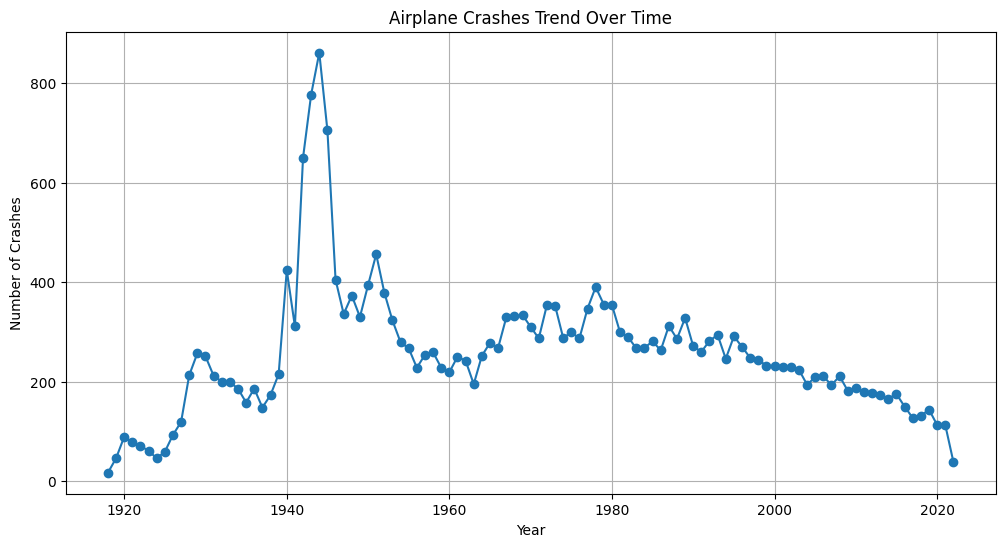

In [142]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
crashes_per_year.plot(kind='line', marker='o')
plt.title('Airplane Crashes Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()


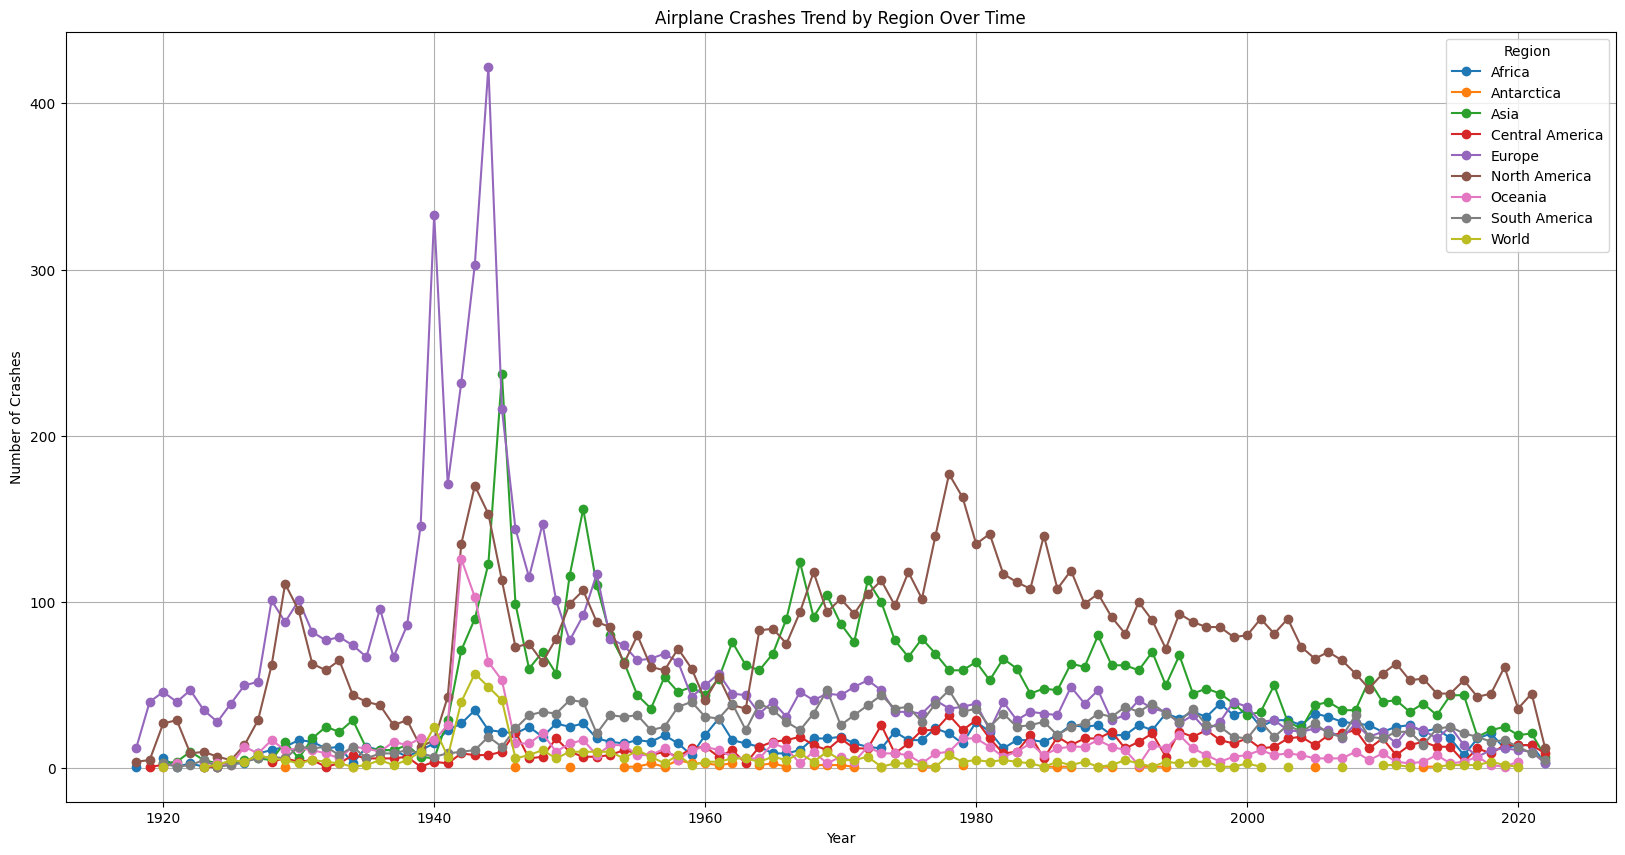

In [143]:
#Trend by Region
crashes_by_region = df.groupby(['Year', 'Region']).size().unstack()
crashes_by_region.plot(kind='line', marker='o', figsize=(20, 10))
plt.title('Airplane Crashes Trend by Region Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.legend(title='Region')
plt.grid(True)
plt.show()


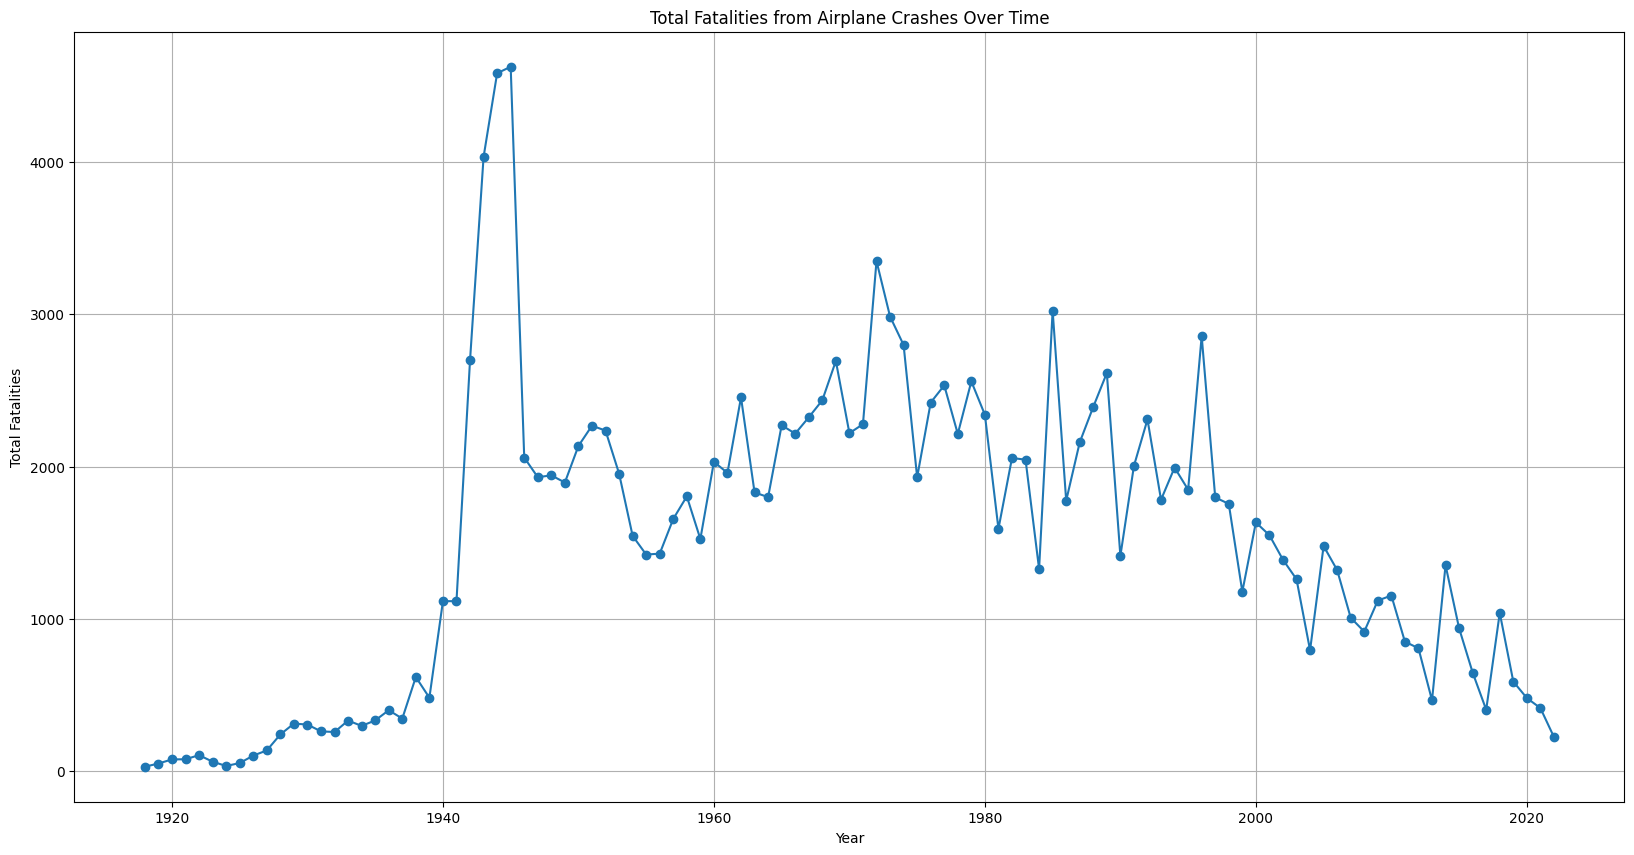

In [144]:
fatalities_per_year = df.groupby('Year')['Total fatalities'].sum()


plt.figure(figsize=(20, 10))
fatalities_per_year.plot(kind='line', marker='o')
plt.title('Total Fatalities from Airplane Crashes Over Time')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.grid(True)
plt.show()


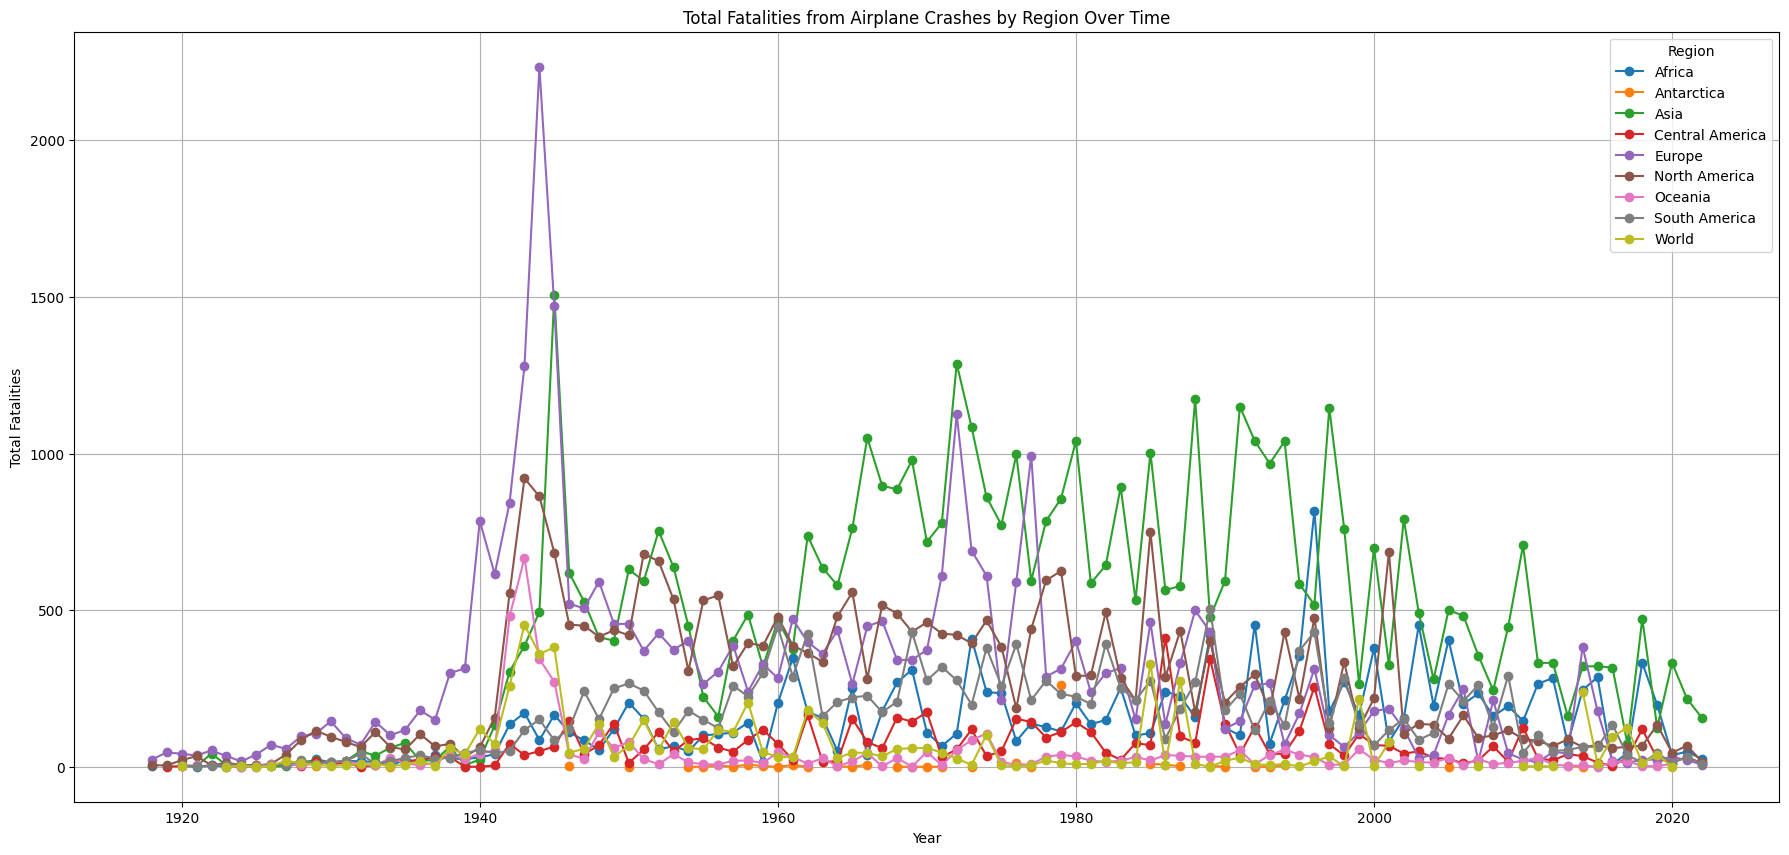

In [145]:
fatalities_by_region = df.groupby(['Year', 'Region'])['Total fatalities'].sum().unstack()
fatalities_by_region.plot(kind='line', marker='o', figsize=(22, 10))
plt.title('Total Fatalities from Airplane Crashes by Region Over Time')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.legend(title='Region')
plt.grid(True)
plt.show()


In [146]:
unique_survivors = df['Survivors'].unique()
print(unique_survivors)


['No' 'Yes']


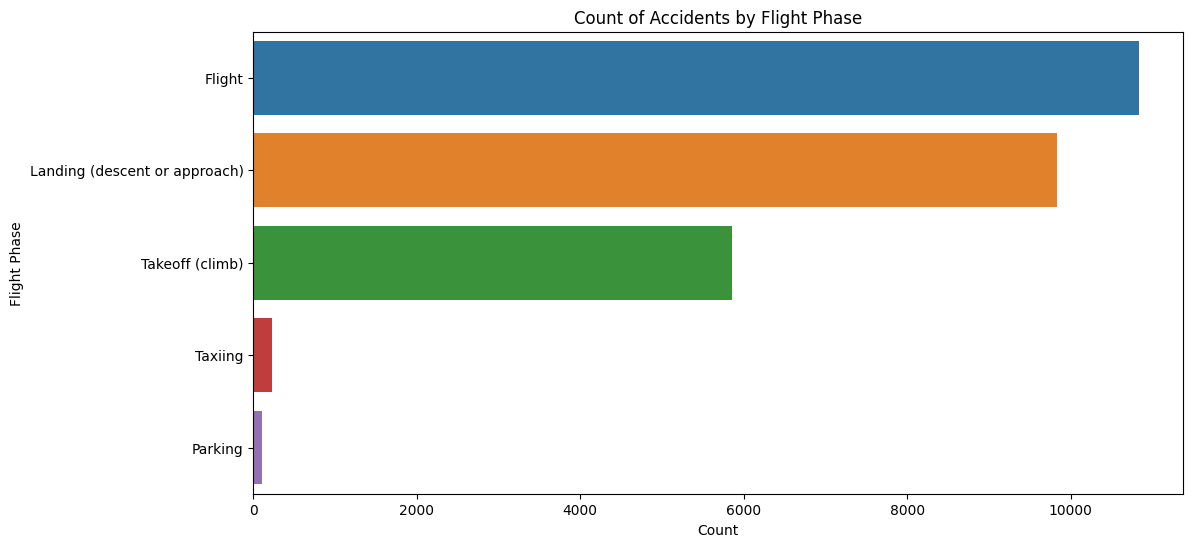

In [147]:
# Plot 2: Flight phase
plt.figure(figsize=(12, 6))
sns.countplot(y='Flight phase', data=df, order=df['Flight phase'].value_counts().index)
plt.title('Count of Accidents by Flight Phase')
plt.xlabel('Count')
plt.ylabel('Flight Phase')
plt.show()

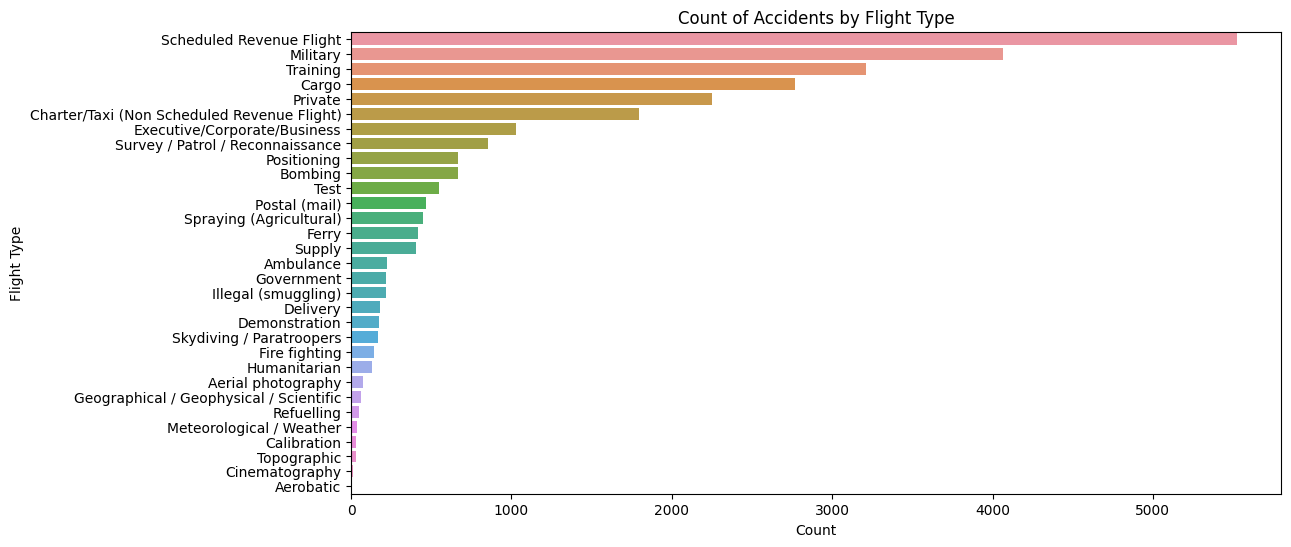

In [148]:
# Plot 3: Flight type
plt.figure(figsize=(12, 6))
sns.countplot(y='Flight type', data=df, order=df['Flight type'].value_counts().index)
plt.title('Count of Accidents by Flight Type')
plt.xlabel('Count')
plt.ylabel('Flight Type')
plt.show()

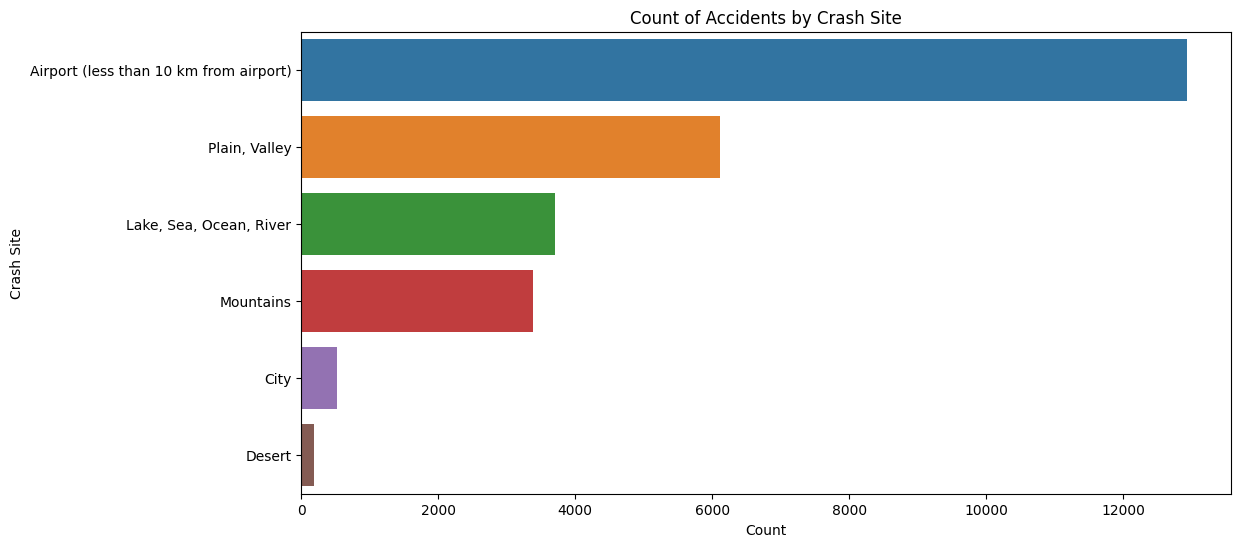

In [149]:
# Plot 4: Crash site
plt.figure(figsize=(12, 6))
sns.countplot(y='Crash site', data=df, order=df['Crash site'].value_counts().index)
plt.title('Count of Accidents by Crash Site')
plt.xlabel('Count')
plt.ylabel('Crash Site')
plt.show()

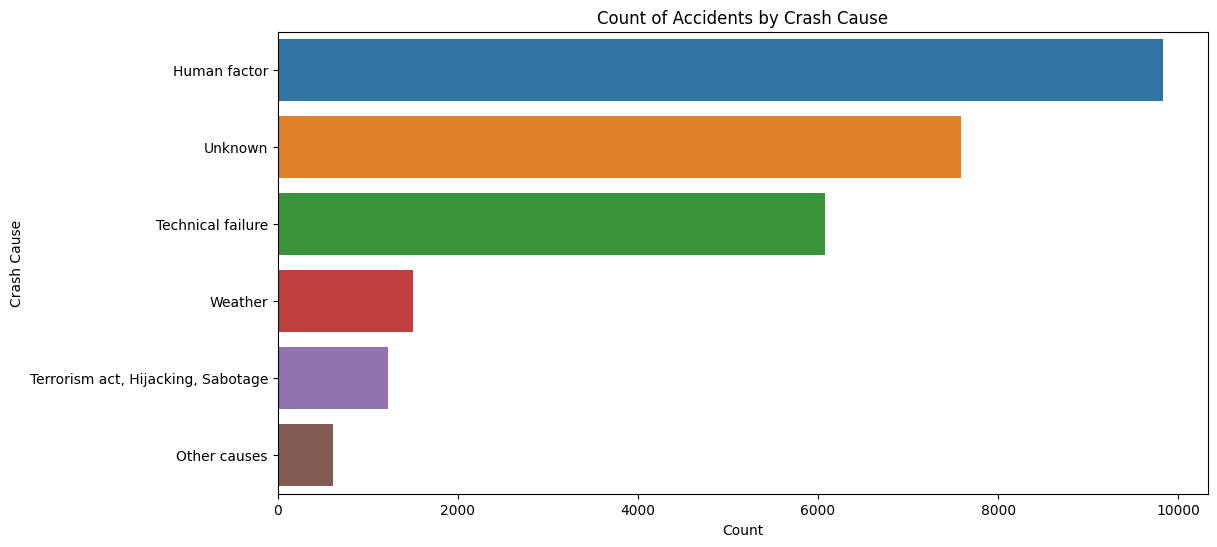

In [150]:
# Plot 5: Crash cause
plt.figure(figsize=(12, 6))
sns.countplot(y='Crash cause', data=df, order=df['Crash cause'].value_counts().index)
plt.title('Count of Accidents by Crash Cause')
plt.xlabel('Count')
plt.ylabel('Crash Cause')
plt.show()

In [151]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder


features = df.drop(['Survivors'], axis=1)
target = df['Survivors']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = features.select_dtypes(include=['float64']).columns
categorical_features = features.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


Epoch 1/100
430/430 [==============================] - 3s 4ms/step - loss: 26.7962 - accuracy: 0.5250 - val_loss: 13.4473 - val_accuracy: 0.4860
Epoch 2/100
430/430 [==============================] - 1s 3ms/step - loss: 19.7418 - accuracy: 0.5203 - val_loss: 22.0695 - val_accuracy: 0.4648
Epoch 3/100
430/430 [==============================] - 1s 3ms/step - loss: 12.9595 - accuracy: 0.5399 - val_loss: 4.1379 - val_accuracy: 0.5814
Epoch 4/100
430/430 [==============================] - 1s 3ms/step - loss: 11.0882 - accuracy: 0.5484 - val_loss: 6.1527 - val_accuracy: 0.5262
Epoch 5/100
430/430 [==============================] - 1s 3ms/step - loss: 10.7682 - accuracy: 0.5565 - val_loss: 6.9865 - val_accuracy: 0.5797
Epoch 6/100
430/430 [==============================] - 2s 4ms/step - loss: 10.6661 - accuracy: 0.5587 - val_loss: 9.1122 - val_accuracy: 0.5279
Epoch 7/100
430/430 [==============================] - 1s 3ms/step - loss: 7.1109 - accuracy: 0.5793 - val_loss: 10.0920 - val_accurac

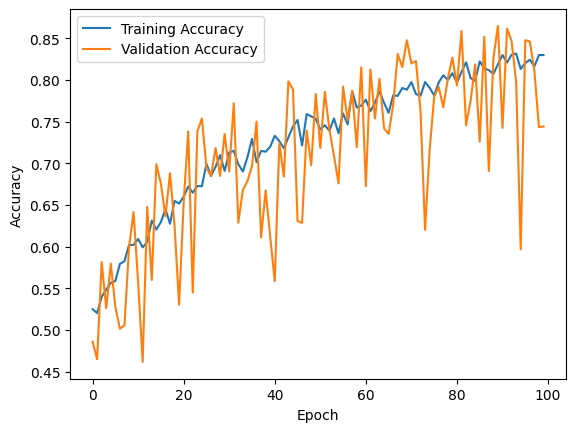

In [152]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Convert the data to numpy arrays
X_train_np = np.array(X_train_preprocessed)

# Ensure that your labels are encoded for classification
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_np, y_train_encoded, test_size=0.2, random_state=42)

# Build a simple neural network
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Display accuracy
print(f'Test Accuracy: {accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
